# **Import Data**

In [ ]:
# # Upload file dari penyimpanan lokal
# from google.colab import files

# uploaded = files.upload()

# # Menampilkan nama file yang diunggah
# for filename in uploaded.keys():
#     print(f'Uploaded file: {filename}')

In [ ]:
# Uploud file dari google drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Membaca dataset sesuai format
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

# Jika excel maka gunakan fungsi "read_excel", jika csv gunakan fungsi "read_csv"
df = pd.read_csv('/content/shipping.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,0.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,Female,44,1233,1
1,2,F,Flight,4,5,216,2,low,Male,59,3088,1
2,3,A,Flight,2,2,183,4,low,Male,48,3374,1
3,4,B,Flight,3,3,176,4,medium,Male,10,1177,1
4,5,C,Flight,2,2,184,3,medium,Female,46,2484,1


# **Preprocessing**

In [2]:
# Menampilkan inofrmasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  0.on.Time_Y.N        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [3]:
# Mengetahui jumlah baris dan kolom dari dataset
print("Jumlah baris: {}\nJumlah kolom: {}".format(df.shape[0], df.shape[1]))

Jumlah baris: 10999
Jumlah kolom: 12


In [4]:
# Menghapus kolom "ID dan gender karena tidak ada korelasi nya"
shipping_df = df.copy()
shipping_df = shipping_df.drop(columns=['ID','Gender'])
shipping_df.tail()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,0.on.Time_Y.N
10994,A,Ship,4,1,252,5,medium,1,1538,1
10995,B,Ship,4,1,232,5,medium,6,1247,0
10996,C,Ship,5,4,242,5,low,4,1155,0
10997,F,Ship,5,2,223,6,medium,2,1210,0
10998,D,Ship,2,5,155,5,low,6,1639,0


In [5]:
# Melakukan pengecekan pada nilai yang hilang (missing value)
shipping_df.isnull().sum()

,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Discount_offered,0
Weight_in_gms,0
0.on.Time_Y.N,0


In [6]:
# cek value dari kolom werehouse
shipping_df['Warehouse_block'].value_counts()

,count
Warehouse_block,
F,3666
D,1834
A,1833
B,1833
C,1833


In [7]:
# cek value dari kolom Shipment
shipping_df['Mode_of_Shipment'].value_counts()

,count
Mode_of_Shipment,
Ship,7462
Flight,1777
Road,1760


In [8]:
# cek value dari kolom Product Importance
shipping_df['Product_importance'].value_counts()

,count
Product_importance,
low,5297
medium,4754
high,948


Mengubah value kategorical menjadi numerical menggunakan LabelEncoder

In [9]:
label_encoder = LabelEncoder()

In [10]:
# mengubah value werehouse menjadi numerical
werehouse_encoded = label_encoder.fit_transform(shipping_df['Warehouse_block'])
shipping_df['Warehouse_block'] = werehouse_encoded

# mengubah value shipment menjadi numerical
shipment_encoded = label_encoder.fit_transform(shipping_df['Mode_of_Shipment'])
shipping_df['Mode_of_Shipment'] = shipment_encoded

# mengubah value product menjadi numerical
product_encoded = label_encoder.fit_transform(shipping_df['Product_importance'])
shipping_df['Product_importance'] = product_encoded

In [11]:
shipping_df.tail()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,0.on.Time_Y.N
10994,0,2,4,1,252,5,2,1,1538,1
10995,1,2,4,1,232,5,2,6,1247,0
10996,2,2,5,4,242,5,1,4,1155,0
10997,4,2,5,2,223,6,2,2,1210,0
10998,3,2,2,5,155,5,1,6,1639,0


In [12]:
# cek value dari kolom werehouse
shipping_df['Warehouse_block'].value_counts()

,count
Warehouse_block,
4,3666
3,1834
0,1833
1,1833
2,1833


Blok F -> 4,
Blok D -> 3,
Blok A -> 0,
Blok B -> 1,
Blok C -> 2

In [13]:
# cek value dari kolom Shipment
shipping_df['Mode_of_Shipment'].value_counts()

,count
Mode_of_Shipment,
2,7462
0,1777
1,1760


Ship -> 2,
Flight -> 0,
Road ->1

In [14]:
# cek value dari kolom Product Importance
shipping_df['Product_importance'].value_counts()

,count
Product_importance,
1,5297
2,4754
0,948


Low -> 1,
Medium -> 2,
High -> 0

In [15]:
# Menampilkan statistik deskriptif dari data
shipping_df.describe()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,0.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,2.333394,1.516865,4.054459,2.990545,210.196836,3.567597,1.346031,13.373216,3634.016729,0.596691
std,1.490726,0.756894,1.141490,1.413603,48.063272,1.522860,0.631434,16.205527,1635.377251,0.490584
min,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,1.000000,1001.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,169.000000,3.000000,1.000000,4.000000,1839.500000,0.000000
50%,3.000000,2.000000,4.000000,3.000000,214.000000,3.000000,1.000000,7.000000,4149.000000,1.000000
75%,4.000000,2.000000,5.000000,4.000000,251.000000,4.000000,2.000000,10.000000,5050.000000,1.000000
max,4.000000,2.000000,7.000000,5.000000,310.000000,10.000000,2.000000,65.000000,7846.000000,1.000000


In [16]:
shipping_df.value_counts()

Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  Product_importance  Discount_offered  Weight_in_gms  0.on.Time_Y.N
0                0                 2                    1                155                  2                1                   2                 5661           1                1
4                0                 2                    2                155                  3                1                   1                 5154           0                1
3                2                 7                    5                269                  4                2                   9                 1835           0                1
                                                                         282                  5                1                   8                 1091           1                1
                                                                         284                  4                2                   8                 1148           1                1
                                                                                                                                                                                    ..
2                0                 2                    1                173                  2                0                   1                 4135           1                1
                                                        2                184                  3                2                   46                2484           1                1
                                                                         242                  3                0                   9                 4717           0                1
                                                                         264                  3                2                   1                 4518           0                1
4                2                 7                    5                306                  4                2                   2                 1281           0                1
Name: count, Length: 10999, dtype: int64

In [17]:
shipping_df.isnull().sum()

,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Discount_offered,0
Weight_in_gms,0
0.on.Time_Y.N,0


In [18]:
# membuat variabel baru untuk meletakkan fungsi
corr = shipping_df.corr()

<Axes: >

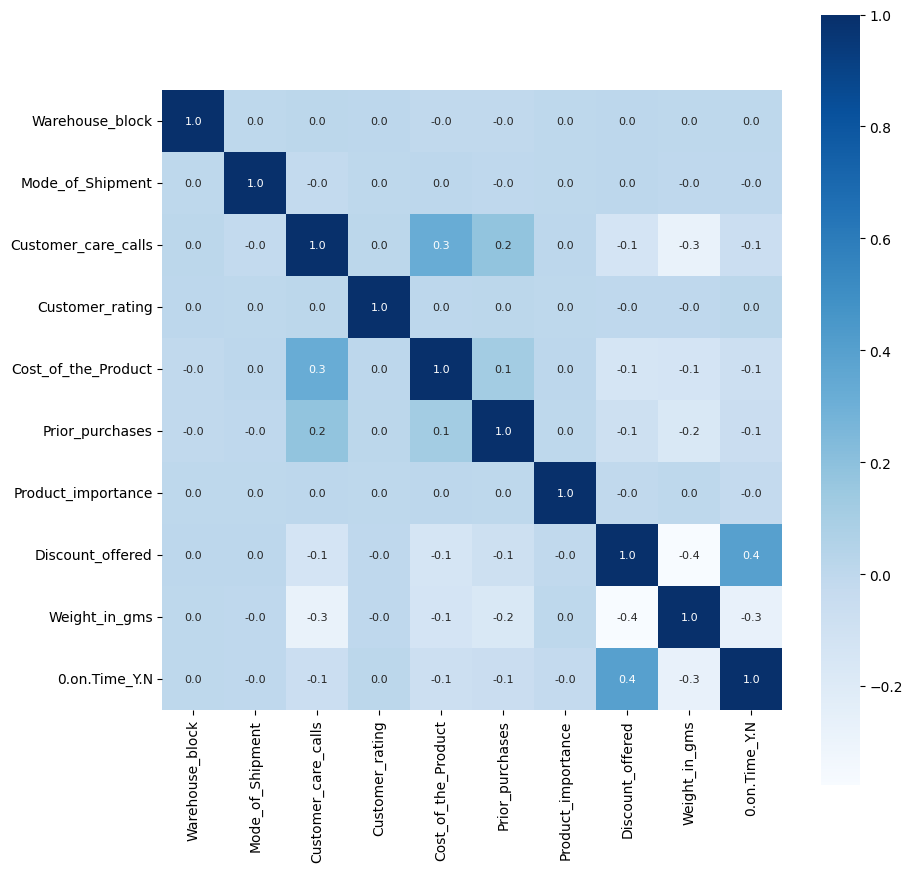

In [19]:
# membuat visualisasi korelasi dataset Shipping
plt.figure(figsize=(10,10))
# sns.heatmap(corr, annot=True,)
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


# **Decision Tree Classification**

In [20]:
# melihat value untuk data target
shipping_df['0.on.Time_Y.N'].value_counts()

,count
0.on.Time_Y.N,
1,6563
0,4436


## Pemagian data K-Fold Validation

In [21]:
# # Memisahkan fitur dengan label
X = shipping_df.drop(columns='0.on.Time_Y.N') # Fitur
y = shipping_df['0.on.Time_Y.N'].values # Label

In [22]:
# Normalisasi dengan Min Max Normalization
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
X_sc = sc.fit_transform(X)

In [23]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

k_folds = KFold(n_splits=10)

In [26]:
# Membuat model Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

clf = DecisionTreeClassifier(random_state=42)

# Variabel untuk menyimpan hasil evaluasi
accuracy_scores = []
precision_scores = []
recall_scores = []

# Melakukan K-Fold Cross-Validation
for train_index, test_index in k_folds.split(X_sc):
    # Membagi data ke dalam data latih dan data uji
    X_train, X_test = X_sc[train_index], X_sc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Melatih model dengan data training
    clf.fit(X_train, y_train)

    # Prediksi menggunakan data testing
    y_pred = clf.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))

In [27]:
# Menghitung rata-rata hasil evaluasi dari semua fold
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
mean_precision = sum(precision_scores) / len(precision_scores)
mean_recall = sum(recall_scores) / len(recall_scores)

# Menampilkan hasil evaluasi
print(f"Rata-rata Akurasi: {mean_accuracy*100:.2f}%")
print(f"Rata-rata Precision: {mean_precision*100:.2f}%")
print(f"Rata-rata Recall: {mean_recall*100:.2f}%")

Rata-rata Akurasi: 64.53%
Rata-rata Precision: 70.24%
Rata-rata Recall: 70.42%


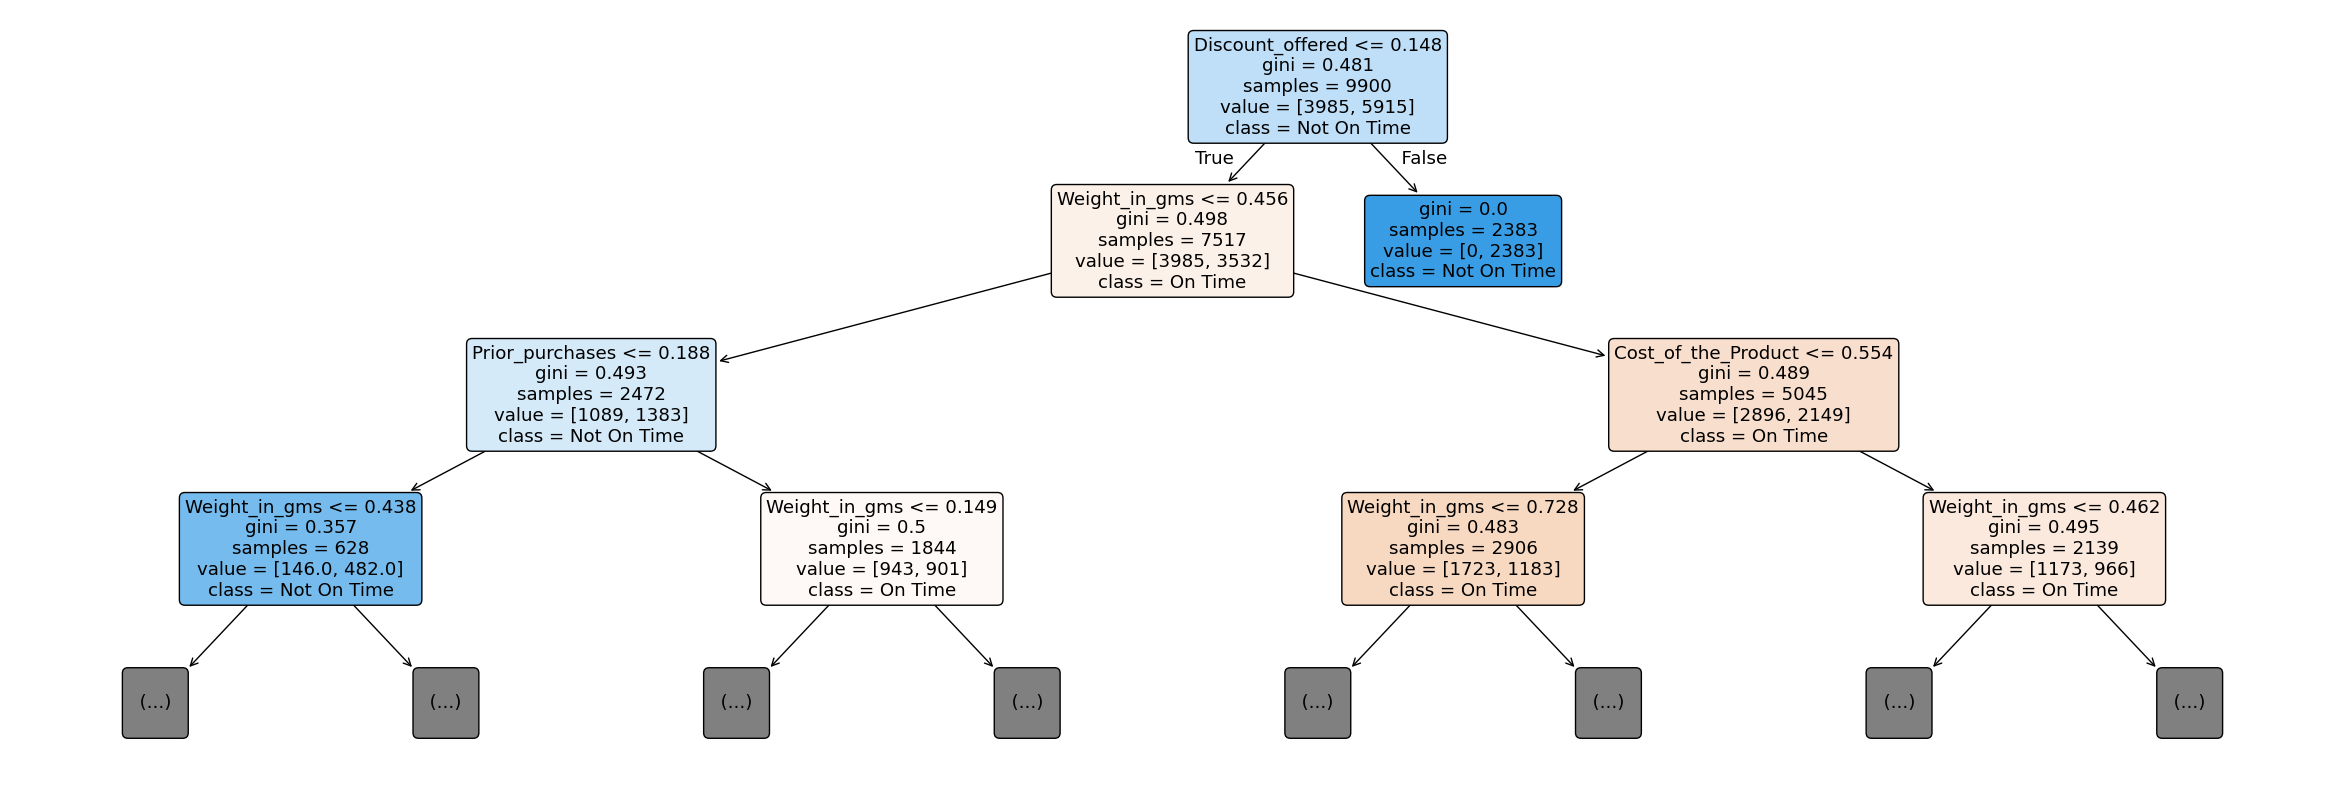

In [36]:
# Membuat visualisasi pohon keputusan
import warnings
warnings.filterwarnings("ignore")
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

plt.figure(figsize=(30, 10))  # Ukuran lebih besar
plot_tree(clf,
          feature_names=X.columns,
          class_names=['On Time', 'Not On Time'],
          max_depth=3,
          filled=True,
          rounded=True)
# plt.figure(figsize=(5, 8))
# plot_tree(clf, feature_names=X_train.columns, class_names=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
#                                                            'Cost_of_the_Product','Discount_offered','Weight_in_gms','0.on.Time_Y.N'], filled=True, rounded=True)
plt.show()

# **Naive Bayes Classification**

## **Pembagian Data dengan Hold-Out Validation**

In [37]:
# Memisahkan fitur dengan label
X = shipping_df.drop(columns='0.on.Time_Y.N')
y = shipping_df['0.on.Time_Y.N'].values

In [38]:
# Normalisasi dengan Min Max Normalization
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
X_sc = sc.fit_transform(X)

In [40]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

## Pemodelan Algoritma NBC

In [41]:
# Membuat model Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Membuat model Gaussian Naive Bayes
model_nbc = GaussianNB()

# Variabel untuk menyimpan hasil evaluasi
accuracy_scores = []
precision_scores = []
recall_scores = []

# Melakukan K-Fold Cross-Validation
for train_index, test_index in k_folds.split(X_sc):
    # Membagi data ke dalam data latih dan uji
    X_train, X_test = X_sc[train_index], X_sc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Melatih model pada data latih
    model_nbc.fit(X_train, y_train)

    # Prediksi pada data uji
    y_pred = model_nbc.predict(X_test)

    # Menyimpan hasil evaluasi untuk setiap fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, zero_division=1))
    recall_scores.append(recall_score(y_test, y_pred, zero_division=1))

In [42]:
# Menampilkan rata-rata hasil evaluasi dari semua fold
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
mean_precision = sum(precision_scores) / len(precision_scores)
mean_recall = sum(recall_scores) / len(recall_scores)

print(f"Rata-rata Akurasi: {mean_accuracy*100:.2f}%")
print(f"Rata-rata Precision: {mean_precision*100:.2f}%")
print(f"Rata-rata Recall: {mean_recall*100:.2f}%")

Rata-rata Akurasi: 65.20%
Rata-rata Precision: 97.74%
Rata-rata Recall: 42.68%


In [43]:
# Menampilkan hasil evalusi model
# from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.99      0.71       451
           1       0.98      0.44      0.60       648

    accuracy                           0.66      1099
   macro avg       0.76      0.71      0.65      1099
weighted avg       0.80      0.66      0.64      1099



# **Pemodelan Algoritma K-NN**

**Pembagian K-Fold Validation**

In [48]:
# Memisahkan fitur dengan label
X = shipping_df.drop(columns='0.on.Time_Y.N')
y = shipping_df['0.on.Time_Y.N'].values

In [49]:
# Normalisasi dengan Min Max Normalization
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
X_sc = sc.fit_transform(X)

In [50]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score

# List untuk menyimpan hasil akurasi
precision_results = []

# Melakukan uji nilai K dari 3 hingga 11
for k in range(3, 12, 2):
    # Membuat model KNN dengan nilai K saat ini
    knn = KNeighborsClassifier(n_neighbors=k)

    # Melatih model dengan data training
    knn.fit(X_sc, y)

    # Prediksi menggunakan data testing
    y_pred = knn.predict(X_sc)

    # Menghitung akurasi
    precision = precision_score(y, y_pred)
    precision_results.append((k, precision))

    print(f"K={k}: precision = {precision*100:.2f}")

# Menampilkan nilai K dengan akurasi terbaik
best_k, best_precision = max(precision_results, key=lambda x: x[1])
print(f"\nBest K= {best_k} with precision: {best_precision*100:.2f}")

K=3: precision = 86.18
K=5: precision = 83.15
K=7: precision = 81.90
K=9: precision = 81.01
K=11: precision = 80.47

Best K= 3 with precision: 86.18


In [52]:
# Membuat model KNN
from sklearn.neighbors import KNeighborsClassifier

# Membuat model Gaussian Naive Bayes
model_knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data training
model_knn.fit(X_sc, y)

# Prediksi menggunakan data testing
y_pred = model_knn.predict(X_sc)

In [53]:
# Menampilkan hasil evalusi model
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      4436
           1       0.86      0.84      0.85      6563

    accuracy                           0.82     10999
   macro avg       0.82      0.82      0.82     10999
weighted avg       0.82      0.82      0.82     10999



In [54]:
# Menampilkan hasil evaluasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

print(f"Akurasi: {accuracy*100:.2f}")
print(f"Precision: {precision*100:.2f}")
print(f"Recall: {recall*100:.2f}")

Akurasi: 82.28
Precision: 86.18
Recall: 83.73


# **Pembagian Data dengan K-Fold Validation**

In [ ]:
# Memisahkan fitur dengan label
X = shipping_df.drop(columns='0.on.Time_Y.N')
y = shipping_df['0.on.Time_Y.N'].values

In [ ]:
# Normalisasi dengan Min Max Normalization
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
X_sc = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

k_folds = KFold(n_splits=10)

# **Algoritma Random Forest**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Membuat model
model_rf = RandomForestClassifier(n_estimators=50, criterion='entropy')

accuracy_rf = cross_val_score(model_rf, X_sc, y, cv=k_folds, scoring='accuracy').mean()
precision_rf = cross_val_score(model_rf, X_sc, y, cv=k_folds, scoring='precision_weighted').mean()
recall_rf = cross_val_score(model_rf, X_sc, y, cv=k_folds, scoring='recall_weighted').mean()

print('Average Accuracy CV Score:', round(accuracy_rf *100, 2))
print('Average Precision CV Score:', round(precision_rf *100, 2))
print('Average Recall CV Score:', round(recall_rf *100, 2))

Average Accuracy CV Score: 66.21
Average Precision CV Score: 64.89
Average Recall CV Score: 66.08


In [ ]:
accuracy_rf = cross_val_score(model_rf, X_sc, y, cv=k_folds, scoring='accuracy').mean()
print(accuracy_rf)

0.6637738439904045


# **Algoritma SVM**

In [ ]:
from sklearn.svm import SVC

# Membuat model SVM
model_svm = SVC(kernel='rbf', random_state=42, gamma=0.1)

# Evaluasi model dengan cross-validation
accuracy_svm = cross_val_score(model_svm, X_sc, y, cv=k_folds, scoring='accuracy').mean()
precision_svm = cross_val_score(model_svm, X_sc, y, cv=k_folds, scoring='precision_weighted').mean()
recall_svm = cross_val_score(model_svm, X_sc, y, cv=k_folds, scoring='recall_weighted').mean()

# Menampilkan hasil evaluasi
print('Average Accuracy CV Score:', round(accuracy_svm * 100, 2))
print('Average Precision CV Score:', round(precision_svm * 100, 2))
print('Average Recall CV Score:', round(recall_svm * 100, 2))

Average Accuracy CV Score: 65.78
Average Precision CV Score: 65.69
Average Recall CV Score: 65.78
